In [40]:
import os
import charts_function_list
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
_,data_folder,outputs = charts_function_list.folder_setup()

In [279]:
os.chdir(data_folder)
health_grades = pd.read_csv('LOS_ANGELES_COUNTY_RESTAURANT_AND_MARKET_INSPECTIONS.csv')

In [520]:
health_grades['ZIP_5']=health_grades['FACILITY ZIP'].apply(lambda x: str(x)[0:5])
health_grades.loc[health_grades['SCORE']<70,'GRADE']='BELOW C'
health_grades = health_grades[health_grades["PROGRAM STATUS"]=='ACTIVE'].copy()
health_grades['FACILITY_WITH_PROGRAM'] = health_grades['FACILITY ID']+health_grades['PROGRAM NAME']

health_grades_active_complete = health_grades

health_grades = health_grades.sort_values(by=['FACILITY_WITH_PROGRAM','ACTIVITY DATE'],ascending=False).drop_duplicates(subset='FACILITY_WITH_PROGRAM').copy()
health_grades.loc[health_grades['PROGRAM NAME'].isnull(),'PROGRAM NAME'] = 'Unknown'

In [650]:
def string_search_plots(restaurant,rows,columns,left_pos,top_pos,width,height,xmin=69,xmax=102,
                        field='Code Name',facecolor='#02818a',xlabels=False,ylabels=False,ymax=60,multiplier=1,start=70,bin_range=33,title=None):  #plot_layout=111
    #ax = fig.add_subplot(plot_layout)
    ax = plt.subplot2grid((rows,columns), (top_pos,left_pos), colspan=width,rowspan=height)
    hist =  plt.hist(health_grades[health_grades[field]==restaurant]['SCORE'],
                    bins=[start+x*multiplier for x in range(bin_range)],edgecolor='white',facecolor=facecolor)
    ax.set_ylim(0,ymax)
    ax.set_xlim(xmin,xmax)
    ax.set_xticklabels([int(x) for x in ax.get_xticks()])
      
    #strip labels with if parameter
    if ylabels == True:
        ax.set_ylabel('Count',fontsize=14,color='#016450')
    if xlabels == True:
        ax.set_xlabel('Health Score',fontsize=14,color='#016450',labelpad=0)
        
    if title != None:
        ax.set_title(title,fontsize=16)
    else:
        ax.set_title(restaurant,fontsize=16)
        
        
    
        
    
        
   

In [624]:
#code naming

health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('Burger King')),'Code Name']='Burger King'
health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('|'.join(['McDonalds','McDonald\'s']))),'Code Name']='McDonald\'s'
health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('Jack in the Box')),'Code Name']='Jack in the Box'


health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('Taco Bell')),'Code Name']='Taco Bell'
health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('Del Taco')),'Code Name']='Del Taco'
health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('Chipotle')),'Code Name']='Chipotle'

health_grades.loc[health_grades['PROGRAM NAME'].str.contains('CVS'),'Code Name']='CVS'


In [629]:
health_grades.loc[health_grades['PROGRAM NAME'].str.contains('CVS'),'Code Name']='CVS'


,ACTIVITY DATE,OWNER ID,OWNER NAME,FACILITY ID,FACILITY NAME,RECORD ID,PROGRAM NAME,PROGRAM STATUS,PROGRAM ELEMENT (PE),PE DESCRIPTION,FACILITY ADDRESS,FACILITY CITY,FACILITY STATE,FACILITY ZIP,SERVICE CODE,SERVICE DESCRIPTION,SCORE,GRADE,SERIAL NUMBER,EMPLOYEE ID,FACILITY_WITH_PROGRAM,ZIP_5,Code_Name,Code Name,Food Name
141840,05/03/2017,OW0012926,"GARFIELD BEACH CVS, LLC.",FA0245688,CVS / PHARMACY # 10857,PR0194059,CVS / PHARMACY # 10857,ACTIVE,1613,"FOOD MKT RETAIL (2,000+ SF) LOW RISK",3033 E HUNTINGTON DR,PASADENA,CA,91107,1,ROUTINE INSPECTION,98,A,DA0YX0KN8,EE0000120,FA0245688CVS / PHARMACY # 10857,91107,False,None,NaN
190549,12/26/2017,OW0012926,"GARFIELD BEACH CVS, LLC.",FA0245493,CVS/PHARMACY #10614,PR0193865,CVS/PHARMACY #10614,ACTIVE,1613,"FOOD MKT RETAIL (2,000+ SF) LOW RISK",800 S GRAND AVE,LOS ANGELES,CA,90017,1,ROUTINE INSPECTION,92,A,DA1021649,EE0000721,FA0245493CVS/PHARMACY #10614,90017,False,None,NaN
137659,04/12/2017,OW0012926,"GARFIELD BEACH CVS, LLC.",FA0244317,CVS PHARMACY #10791,PR0192595,CVS PHARMACY #10791,ACTIVE,1613,"FOOD MKT RETAIL (2,000+ SF) LOW RISK",8000 W SUNSET BLVD,LOS ANGELES,CA,90046,1,ROUTINE INSPECTION,98,A,DA2JBLSVT,EE0000838,FA0244317CVS PHARMACY #10791,90046,False,None,NaN
162813,08/11/2017,OW0012926,"GARFIELD BEACH CVS, LLC.",FA0244316,CVS PHARMACY #10916,PR0192596,CVS PHARMACY #10916,ACTIVE,1613,"FOOD MKT RETAIL (2,000+ SF) LOW RISK",7508 MELROSE AVE,LOS ANGELES,CA,90046,1,ROUTINE INSPECTION,96,A,DANB4SS4K,EE0000951,FA0244316CVS PHARMACY #10916,90046,False,None,NaN
125262,02/15/2017,OW0012926,"GARFIELD BEACH CVS, LLC.",FA0243021,CVS/PHARMACY #11034,PR0191245,CVS/PHARMACY #11034,ACTIVE,1610,"FOOD MKT RETAIL (25-1,999 SF) LOW RISK",11900 BALBOA BLVD,GRANADA HILLS,CA,91344-2755,1,ROUTINE INSPECTION,98,A,DAWYVO1HC,EE0000011,FA0243021CVS/PHARMACY #11034,91344,False,None,NaN
80840,07/21/2016,OW0012926,"GARFIELD BEACH CVS, LLC.",FA0225854,CVS/PHARMACY #10509,PR0181175,CVS/PHARMACY #10509,ACTIVE,1610,"FOOD MKT RETAIL (25-1,999 SF) LOW RISK",3627 E CESAR CHAVEZ AVE,LOS ANGELES,CA,90063,1,ROUTINE INSPECTION,94,A,DALRN70LU,EE0000557,FA0225854CVS/PHARMACY #10509,90063,False,None,NaN
114164,12/21/2016,OW0012926,"GARFIELD BEACH CVS, LLC.",FA0222729,CVS PHARMACY #10433,PR0177753,CVS PHARMACY #10433,ACTIVE,1613,"FOOD MKT RETAIL (2,000+ SF) LOW RISK",6201 HOLLYWOOD BLVD # 126,LOS ANGELES,CA,90028-5363,1,ROUTINE INSPECTION,99,A,DARUKK0HA,EE0000709,FA0222729CVS PHARMACY #10433,90028,False,None,NaN
172446,09/29/2017,OW0012926,"GARFIELD BEACH CVS, LLC.",FA0170268,CVS/PHARMACY #10146,PR0160731,CVS/PHARMACY #10146,ACTIVE,1613,"FOOD MKT RETAIL (2,000+ SF) LOW RISK",12746 W JEFFERSON BLVD STE 3160,PLAYA VISTA,CA,90094,1,ROUTINE INSPECTION,99,A,DAAHM9OHS,EE0001014,FA0170268CVS/PHARMACY #10146,90094,False,None,NaN
72915,06/15/2016,OW0012926,"GARFIELD BEACH CVS, LLC.",FA0164381,CVS/ PHARMACY #10309,PR0152651,CVS/ PHARMACY #10309,ACTIVE,1613,"FOOD MKT RETAIL (2,000+ SF) LOW RISK",210 W 7TH ST,LOS ANGELES,CA,90014,1,ROUTINE INSPECTION,94,A,DAPMZBH2J,EE0000721,FA0164381CVS/ PHARMACY #10309,90014,False,None,NaN
112468,12/14/2016,OW0012926,"GARFIELD BEACH CVS, LLC.",FA0163016,CVS #10292,PR0151181,CVS #10292,ACTIVE,1610,"FOOD MKT RETAIL (25-1,999 SF) LOW RISK",4030 S WESTERN AVE,LOS ANGELES,CA,90062,1,ROUTINE INSPECTION,98,A,DAK7NOIBM,EE0000798,FA0163016CVS #10292,90062,False,None,NaN


In [668]:
health_grades.pivot_table('PROGRAM STATUS',index='SCORE',columns='Code Name',aggfunc='count')['Burger King'].max()

28.0

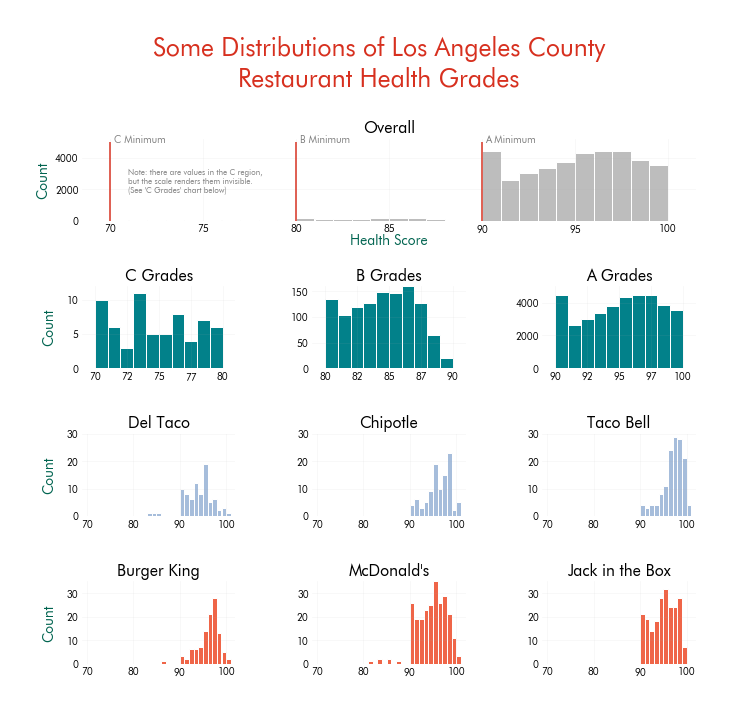

In [660]:
fig = plt.figure(figsize=(11,11))
fig.suptitle('Some Distributions of Los Angeles County\nRestaurant Health Grades',fontsize=25,color='#d7301f')
plt.subplots_adjust(top=.85)
rows=12
columns=3
main_color='#bdbdbd'

ax = plt.subplot2grid((rows,columns), (0,0), colspan=columns,rowspan=2)
hist =  plt.hist(health_grades['SCORE'],bins=[70+x for x in range(31)],edgecolor='white',facecolor=main_color)
ax.set_title('Overall',fontsize=16)  
ax.set_ylabel('Count',fontsize=14,color='#016450',labelpad=5)
ax.set_xlabel('Health Score',fontsize=14,color='#016450',labelpad=0)
ax.vlines(x=90,ymin=0,ymax=5000,colors='#d7301f')
ax.vlines(x=80,ymin=0,ymax=5000,colors='#d7301f')
ax.vlines(x=70,ymin=0,ymax=5000,colors='#d7301f')
ax.text(70.2,5000,'C Minimum',alpha=.5)
ax.text(80.2,5000,'B Minimum',alpha=.5)
ax.text(90.2,5000,'A Minimum',alpha=.5)
ax.text(71,2500,'Note: there are values in the C region,\nbut the scale renders them invisible.\n(See \'C Grades\' chart below)',
        alpha=.5,va='center',fontsize=8)


string_search_plots('C',rows=rows,columns=columns,left_pos=0,top_pos=3,width=1,height=2,ylabels=True,
                    field='GRADE',xmin=69,xmax=81,ymax=12,multiplier=1,start=70,bin_range=11,title='C Grades')

string_search_plots('B',rows=rows,columns=columns,left_pos=1,top_pos=3,width=1,height=2,
                    field='GRADE',xmin=79,xmax=91,ymax=160,multiplier=1,start=80,bin_range=11,title='B Grades')

string_search_plots('A',rows=rows,columns=columns,left_pos=2,top_pos=3,width=1,height=2,
                    field='GRADE',xmin=89,xmax=101,ymax=5000,multiplier=1,start=90,bin_range=11,title='A Grades')


taco_color = '#a6bddb'

string_search_plots('Del Taco',rows=rows,columns=columns,left_pos=0,top_pos=6,width=1,height=2,ymax=30,ylabels=True,facecolor=taco_color)
string_search_plots('Chipotle',rows=rows,columns=columns,left_pos=1,top_pos=6,width=1,height=2,ymax=30,facecolor=taco_color)
string_search_plots('Taco Bell',rows=rows,columns=columns,left_pos=2,top_pos=6,width=1,height=2,ymax=30,facecolor=taco_color)

#string_search_plots('Taco Bell',plot_layout=323)
#string_search_plots('Del Taco',plot_layout=324)
#string_search_plots('Jack in the Box',plot_layout=325)

burger_color = '#ef6548'
string_search_plots('Burger King',rows=rows,columns=columns,left_pos=0,top_pos=9,width=1,height=2,ymax=35,ylabels=True,facecolor=burger_color)
string_search_plots('McDonald\'s',rows=rows,columns=columns,left_pos=1,top_pos=9,width=1,height=2,ymax=35,facecolor=burger_color)
string_search_plots('Jack in the Box',rows=rows,columns=columns,left_pos=2,top_pos=9,width=1,height=2,ymax=35,facecolor=burger_color)


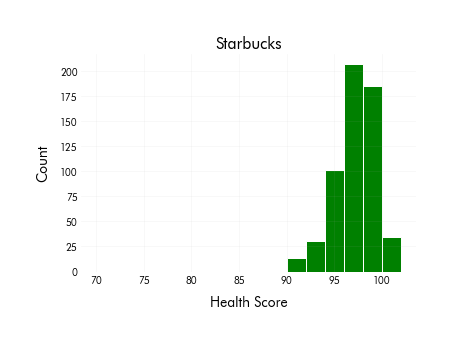

In [301]:
string_search_plots('Starbucks',facecolor='Green')

In [95]:
def pivot_combine(index_type):
    grade_summary = health_grades.pivot_table('SCORE',index=index_type,columns='GRADE',aggfunc='count',margins=True).fillna(0)
    grade_summary_per = grade_summary[['A','B','BELOW C','C']].div(grade_summary['All'],axis=0)
    grade_summary_per['B_Or_Below_Per']=grade_summary_per[['B','BELOW C','C']].sum(axis=1)

    grade_summary_per = grade_summary_per.rename(columns={'A':'A Percent',
                                             'B':'B Percent',
                                            'C':'C Percent',
                                            'BELOW C':'BELOW C Percent'})

    return pd.merge(grade_summary,grade_summary_per,left_index=True,right_index=True,how='left')

In [107]:
pivot_combine('ZIP_5').sort_values(by='C Percent',ascending=False)

GRADE,A,B,BELOW C,C,All,A Percent,B Percent,BELOW C Percent,C Percent,B_Or_Below_Per
ZIP_5,,,,,,,,,,
91749,0.000,2.000,0.000,2.000,4.000,0.000,0.500,0.000,0.500,1.000
90510,4.000,0.000,0.000,1.000,5.000,0.800,0.000,0.000,0.200,0.200
90755,214.000,26.000,1.000,11.000,252.000,0.849,0.103,0.004,0.044,0.151
90506,24.000,0.000,0.000,1.000,25.000,0.960,0.000,0.000,0.040,0.040
90810,60.000,16.000,0.000,3.000,79.000,0.759,0.203,0.000,0.038,0.241
91755,186.000,40.000,1.000,8.000,235.000,0.791,0.170,0.004,0.034,0.209
90704,171.000,59.000,0.000,7.000,237.000,0.722,0.249,0.000,0.030,0.278
93243,38.000,2.000,0.000,1.000,41.000,0.927,0.049,0.000,0.024,0.073
91754,936.000,269.000,2.000,26.000,1233.000,0.759,0.218,0.002,0.021,0.241
